**Import libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import constants
import helpers

**Load the figures folder path and create it if it doesn't exist**

In [2]:
figs_folder = constants.REPORTS_FIGS_PATH + 'recognizer analysis/'
helpers.dir_exists(figs_folder)

**Read the csv file with the analysis of the training**

In [3]:
recognizer_analysis = pd.read_csv(constants.REPORTS_PATH + 'recognizer_analysis.csv')
recognizer_analysis = recognizer_analysis[recognizer_analysis['augmentation'] == 'simple'].drop('augmentation', axis=1)
recognizer_analysis

,model,scheduler,img_res,initial_lr,max_train_acc,max_val_acc,test_acc
0,mini,constant,30,0.001,0.805492,0.618878,0.735890
1,mini,constant,30,0.001,0.783842,0.597194,0.716119
2,mini,constant,30,0.001,0.799938,0.619898,0.731107
3,mini,constant,30,0.001,0.800051,0.605612,0.719866
4,mini,constant,30,0.001,0.791266,0.610204,0.717714
...,...,...,...,...,...,...,...
275,v0.3,constant,50,0.001,0.982572,0.886990,0.937737
276,v0.3,constant,50,0.001,0.983139,0.885204,0.938684
277,v0.3,constant,50,0.001,0.974893,0.855867,0.930950
278,v0.3,constant,50,0.001,0.971294,0.855102,0.922822


**Function to create an amazing bar plot**

In [4]:
def plot_amazing_bar_plot_columns(df: pd.DataFrame, columns: list, xlabel: str, ylabel: str, title: str):
    """
    Plot a beautiful bar plot, accepting several bars per element (maximum of 4). The figures are saved in
    the folder of the variable 'figs_folder'
    :param df: DataFrame
    :param columns: list with the columns to get the data for each bar per element.
    :param xlabel: label for the axis X.
    :param ylabel: label for the axis Y.
    :param title: Title of the plot, also used to name the file where it will be saved.
    """

    fig, ax = plt.subplots(1)
    my_range= (len(columns) + 1) * np.array(range(0, len(df.index)))
    colors = ['#00FF00', '#FF0000', '#007ACC', '#000000']
    if len(columns) < 3:
        colors = ['#007ACC', '#00FF00']
    for i, column in enumerate(columns):
        # create for each expense type an horizontal line that starts at x = 0 with the length 
        # represented by the specific expense percentage value.
        extra_pos = i % len(columns)
        plt.hlines(y=my_range + extra_pos, xmin=0, xmax=df[column], color=colors[extra_pos], alpha=0.2, linewidth=5, 
                   label=column.replace('_', ' ').capitalize())
        
        # create for each line a dot at the end of it
        plt.plot(df[column], my_range + extra_pos, "o", markersize=5, color=colors[extra_pos], alpha=0.6)
        
    # set labels
    ax.set_xlabel(xlabel, fontsize=12, fontweight='black', color = '#333F4B')
    ax.set_ylabel('')
    
    # set axis
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.yticks(my_range + (1 if len(columns) > 1 else 0), df.index)
    
    # add an horizonal label for the y axis 
    fig.text(-0.1, 0.9, ylabel, fontsize=12, fontweight='black', color = '#333F4B')
    

    # change the style of the axis spines
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_smart_bounds(True)
    ax.spines['bottom'].set_smart_bounds(True)
    
    # set the spines position
    ax.spines['bottom'].set_position(('axes', -0.04))
    ax.spines['left'].set_position(('axes', 0.015))
    
    fig_path = figs_folder + title.lower().replace(' ', '-') + '-' + '-'.join(columns).replace('_', '-') + '.png'
    if len(columns) > 1:
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                   ncol=len(columns), mode="expand", borderaxespad=0.)
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')

    # add title after saving the figure so it can be used in the LaTeX report
    fig.text(0.25, 1, title, fontsize=15, fontweight='black', color = '#333F4B')
    plt.show()

**Function to get a dataframe grouped by model, selecting a column that has a particular value.
Ordering by the test accuracy in ascending or descending order**

In [5]:
def get_mean_with_column_value(df, column='img_res', value=50, ascending=True, sort_by='test_acc'):
    df = df[df[column] == value].groupby('model').mean()
    if sort_by:
        return df.sort_values(by=sort_by, ascending=ascending)
    else:
        return df.sort_index(ascending=ascending)

**Compare the models test accuracy in different graphs for the different resolutions**

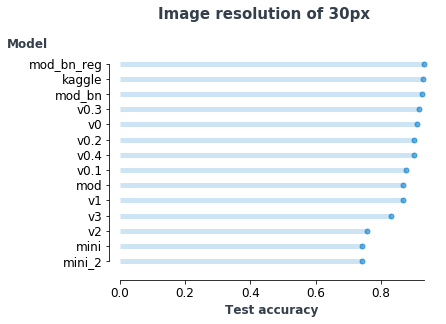

Image resolution of 30px. Maximum test accuracy of 93.12 % obtained by the model: mod_bn_reg


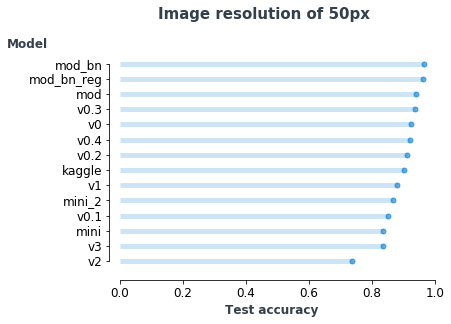

Image resolution of 50px. Maximum test accuracy of 96.49 % obtained by the model: mod_bn


In [6]:
mean_df = get_mean_with_column_value(recognizer_analysis, 'img_res', 30)
plot_amazing_bar_plot_columns(mean_df, columns=['test_acc'], xlabel='Test accuracy',  ylabel='Model', 
                      title='Image resolution of 30px')
print("Image resolution of 30px. Maximum test accuracy of {:.2f} % obtained by the model: {}"
      .format(100 * mean_df['test_acc'].max(), mean_df['test_acc'].idxmax()))

mean_df = get_mean_with_column_value(recognizer_analysis, 'img_res', 50)
plot_amazing_bar_plot_columns(mean_df, columns=['test_acc'], xlabel='Test accuracy',  ylabel='Model', 
                      title='Image resolution of 50px')
print("Image resolution of 50px. Maximum test accuracy of {:.2f} % obtained by the model: {}"
      .format(100 * mean_df['test_acc'].max(), mean_df['test_acc'].idxmax()))

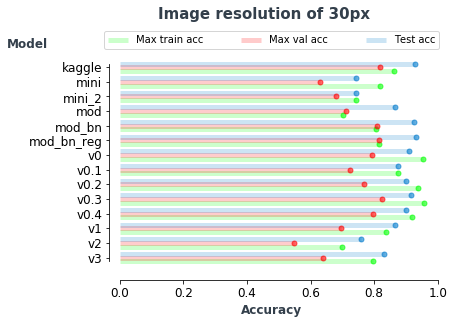

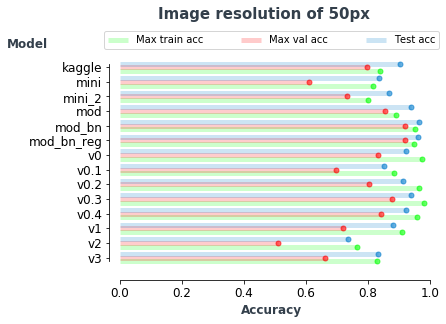

In [7]:
mean_df = get_mean_with_column_value(recognizer_analysis, 'img_res', 30, ascending=False, sort_by=None)
plot_amazing_bar_plot_columns(mean_df, columns=['max_train_acc', 'max_val_acc', 'test_acc'], 
                              xlabel='Accuracy',  ylabel='Model', title='Image resolution of 30px')
mean_df = get_mean_with_column_value(recognizer_analysis, 'img_res', 50, ascending=False, sort_by=None)
plot_amazing_bar_plot_columns(mean_df, columns=['max_train_acc', 'max_val_acc', 'test_acc'], 
                              xlabel='Accuracy',  ylabel='Model', title='Image resolution of 50px')


## From now on we will only work with image resolution of 50 pixels

In [8]:
recognizer_analysis_50 = recognizer_analysis[recognizer_analysis['img_res'] == 50]

We create a new measure to check which models may be more interesting, efficiency, 
as the test accuracy divided by the number of parameter of the model. 
We then normalize them so they can be presented in the same graph as the test accuracy.

In [9]:
from models.recognition import recognizer_all

n_params_50 = {}
n_params_30 = {}
for version in recognizer_all.versions:
    model = recognizer_all.Recognizer(dataset_name='COCO', img_res=50, train=False, model_version=version)
    n_params_50[version] = model.train_model.count_params()
    model = recognizer_all.Recognizer(dataset_name='COCO', img_res=30, train=False, model_version=version)
    n_params_30[version] = model.train_model.count_params()


n_params_50 = pd.Series(n_params_50, name='n_params')
n_params_30 = pd.Series(n_params_30, name='n_params')

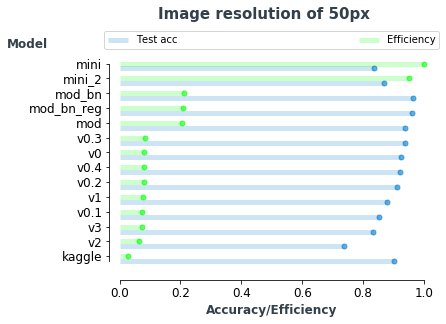

In [10]:
mean_df = recognizer_analysis_50.groupby('model').mean().sort_values(by='test_acc', ascending=True)
efficiency = mean_df['test_acc'] / n_params_50
efficiency_normalized = efficiency / efficiency.max()
new_df = pd.DataFrame([mean_df['test_acc'], efficiency_normalized]).transpose()
new_df = new_df.rename(columns={'Unnamed 0':'efficiency'}).sort_values(by='efficiency')
plot_amazing_bar_plot_columns(new_df, columns=new_df.columns, 
                              xlabel='Accuracy/Efficiency', ylabel='Model', title='Image resolution of 50px')

**Does the cosine decay scheduler improve the training?**

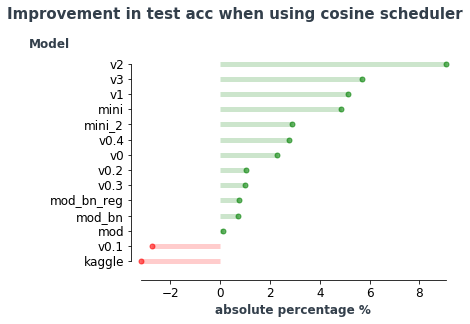

Using the cosine decay scheduler improved the models on average 2.16 % in absolut percentage.


In [11]:
mean_df_cosine = get_mean_with_column_value(recognizer_analysis_50, 'scheduler', 'cosine')
mean_df_const = get_mean_with_column_value(recognizer_analysis_50, 'scheduler', 'constant')
values = (mean_df_cosine['test_acc'] - mean_df_const['test_acc']).sort_values() * 100

y_range = list(range(len(values)))
# plt.hlines(y=my_range + extra_pos, xmin=0, xmax=df[column], color=colors[extra_pos], alpha=0.2, linewidth=5, 
#                    label=column.replace('_', ' ').capitalize())
        
negative_improvement = values[values < 0]
positive_improvement = values[values >= 0]

fig, ax = plt.subplots(1)

# Create the lines, green when positive improvement, red otherwise
ax.hlines(y=y_range[:len(negative_improvement)], xmin=negative_improvement, xmax=0, color='r', alpha=0.2, linewidth=5)
ax.hlines(y=y_range[len(negative_improvement):], xmin=0, xmax=positive_improvement, color='g', alpha=0.2, linewidth=5)

# create for each line a dot at the end of it
ax.plot(negative_improvement, y_range[:len(negative_improvement)], "o", markersize=5, color='r', alpha=0.6)
ax.plot(positive_improvement, y_range[len(negative_improvement):], "o", markersize=5, color='g', alpha=0.6)

# set labels
ax.set_xlabel('absolute percentage %', fontsize=12, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# add an horizonal label for the y axis 
fig.text(-0.1, 0.9, 'Model', fontsize=12, fontweight='black', color = '#333F4B')

# set axis
plt.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(y_range, values.index)

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

plt.savefig(figs_folder + 'improvement-test-acc-cosine-scheduler-50px.png', dpi=300, bbox_inches='tight')

# add title after saving the figure
fig.text(-0.15, 1, "Improvement in test acc when using cosine scheduler", fontsize=15, fontweight='black', color = '#333F4B')
plt.show()

print("Using the cosine decay scheduler improved the models on average {:.2f} % in absolut percentage.".format(values.mean()))

In [12]:
recognizer_analysis = pd.read_csv(constants.REPORTS_PATH + 'recognizer_analysis.csv')
recognizer_analysis_30 = get_mean_with_column_value(recognizer_analysis, 'img_res', 30).drop(columns='initial_lr')
recognizer_analysis_50 = get_mean_with_column_value(recognizer_analysis, 'img_res', 50).drop(columns='initial_lr')
mean_analysis = pd.concat([recognizer_analysis_30, recognizer_analysis_50])
print(mean_analysis.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  img\_res &  max\_train\_acc &  max\_val\_acc &  test\_acc \\
model      &          &                &              &           \\
\midrule
mod\_bn\_reg &       30 &       0.555106 &     0.542568 &  0.620807 \\
mini\_2     &       30 &       0.741415 &     0.681633 &  0.742282 \\
mini       &       30 &       0.817847 &     0.629235 &  0.742738 \\
v2         &       30 &       0.699734 &     0.548622 &  0.757278 \\
v3         &       30 &       0.796925 &     0.640459 &  0.829735 \\
v1         &       30 &       0.838275 &     0.694745 &  0.865936 \\
mod        &       30 &       0.701400 &     0.712423 &  0.866861 \\
v0.1       &       30 &       0.875961 &     0.722755 &  0.875821 \\
v0.4       &       30 &       0.920103 &     0.795077 &  0.899354 \\
v0.2       &       30 &       0.937346 &     0.767041 &  0.900263 \\
v0         &       30 &       0.955045 &     0.793903 &  0.910730 \\
v0.3       &       30 &       0.956618 &     0.824923 &  0.91

In [13]:
from itertools import product

img_res = recognizer_analysis['img_res'].unique()
columns = ['max_train_acc', 'max_val_acc', 'test_acc']
rows = list(product(img_res, columns))
idx = pd.MultiIndex.from_tuples(rows)
combination_all_measures = pd.concat([recognizer_analysis_30.drop(columns='img_res')[columns], 
                                      recognizer_analysis_50.drop(columns='img_res')[columns]], 
                                     axis=1, sort=True)
combination_all_measures = pd.DataFrame(combination_all_measures.values, 
                                        columns=idx, 
                                        index=combination_all_measures.index)
combination_all_measures

30                                  50              \
           max_train_acc max_val_acc  test_acc max_train_acc max_val_acc   
kaggle          0.861413    0.819541  0.927057      0.741683    0.846936   
mini            0.817847    0.629235  0.742738      0.817130    0.608801   
mini_2          0.741415    0.681633  0.742282      0.798464    0.730638   
mod             0.701400    0.712423  0.866861      0.890235    0.854031   
mod_bn          0.807076    0.808622  0.925016      0.949732    0.919133   
mod_bn_reg      0.555106    0.542568  0.620807      0.800604    0.932404   
v0              0.955045    0.793903  0.910730      0.972969    0.830918   
v0.1            0.875961    0.722755  0.875821      0.882683    0.696531   
v0.2            0.937346    0.767041  0.900263      0.964567    0.802704   
v0.3            0.956618    0.824923  0.914615      0.979900    0.876505   
v0.4            0.920103    0.795077  0.899354      0.957137    0.841582   
v1              0.838275    0.694745  0.865936      0.908651    0.717755   
v2              0.699734    0.548622  0.757278      0.764845    0.509209   
v3              0.796925    0.640459  0.829735      0.828638    0.662372   

                      
            test_acc  
kaggle      0.925756  
mini        0.834216  
mini_2      0.867898  
mod         0.939174  
mod_bn      0.964868  
mod_bn_reg  0.970287  
v0          0.923222  
v0.1        0.851666  
v0.2        0.911360  
v0.3        0.936545  
v0.4        0.921333  
v1          0.879823  
v2          0.735587  
v3          0.833379

**Create table for the report**

In [14]:
ra = recognizer_analysis[['model', 'scheduler', 'img_res', 'test_acc']]
ra_30 = ra[ra['img_res'] == 30].drop(columns='img_res')
ra_50 = ra[ra['img_res'] == 50].drop(columns='img_res')

def filter_scheduler_concat(df):
    ra_const = get_mean_with_column_value(df, column='scheduler', value='constant')
    ra_const['test_acc'] = ra_const['test_acc'].apply(lambda x: '{:.2f}'.format(100 * x))
    ra_const.rename(columns={'test_acc': 'test acc const'}, inplace=True)
    
    ra_cos = get_mean_with_column_value(df, column='scheduler', value='cosine')
    ra_cos['test_acc'] = ra_cos['test_acc'].apply(lambda x: '{:.2f}'.format(100 * x))
    ra_cos.rename(columns={'test_acc': 'test acc cos'}, inplace=True)
    
    return pd.concat([ra_cos, ra_const], axis=1, sort=True)

ra_30 = filter_scheduler_concat(ra_30)
ra_30['n params'] = n_params_30[ra_30.index].apply(lambda x: '{:,}'.format(x))

ra_50 = filter_scheduler_concat(ra_50)
ra_50['n params'] = n_params_50[ra_50.index].apply(lambda x: '{:,}'.format(x))

columns = ['n params', 'test acc const', 'test acc cos']
rows = list(product(['30', '50'], columns))
idx = pd.MultiIndex.from_tuples(rows)

combination_tests = pd.concat([ra_30[columns],
                               ra_50[columns]], 
                              axis=1, sort=False)
combination_tests = pd.DataFrame(combination_tests.values, 
                                 columns=idx, 
                                 index=combination_tests.index)
combination_tests

30                                     50                 \
           n params test acc const test acc cos   n params test acc const   
kaggle      488,272          93.14        92.27  1,717,072          94.51   
mini         26,512          72.41        76.13     41,872          81.00   
mini_2       30,416          72.70        75.76     45,776          85.36   
mod          76,496          87.27        86.10    230,096          93.86   
mod_bn       76,624          92.77        92.24    230,224          96.13   
mod_bn_reg   76,624          51.51        77.94    230,224          95.69   
v0          247,568          90.09        92.05    575,248          91.18   
v0.1        247,568          85.48        89.68    575,248          86.54   
v0.2        247,056          89.06        90.99    574,736          90.62   
v0.3        246,800          90.63        92.30    574,480          93.16   
v0.4        246,800          88.81        91.06    574,480          90.75   
v1          247,568          84.28        88.91    575,248          85.43   
v2          246,672          72.88        78.58    574,352          69.03   
v3          246,672          80.56        85.39    574,352          80.50   

                         
           test acc cos  
kaggle            88.70  
mini              85.85  
mini_2            88.22  
mod               93.98  
mod_bn            96.85  
mod_bn_reg        97.54  
v0                93.46  
v0.1              83.79  
v0.2              91.65  
v0.3              94.15  
v0.4              93.52  
v1                90.54  
v2                78.08  
v3                86.18

In [15]:
print(combination_tests.to_latex())

\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{l}{30} & \multicolumn{3}{l}{50} \\
{} & n params & test acc const & test acc cos &   n params & test acc const & test acc cos \\
\midrule
kaggle     &  488,272 &          93.14 &        92.27 &  1,717,072 &          94.51 &        88.70 \\
mini       &   26,512 &          72.41 &        76.13 &     41,872 &          81.00 &        85.85 \\
mini\_2     &   30,416 &          72.70 &        75.76 &     45,776 &          85.36 &        88.22 \\
mod        &   76,496 &          87.27 &        86.10 &    230,096 &          93.86 &        93.98 \\
mod\_bn     &   76,624 &          92.77 &        92.24 &    230,224 &          96.13 &        96.85 \\
mod\_bn\_reg &   76,624 &          51.51 &        77.94 &    230,224 &          95.69 &        97.54 \\
v0         &  247,568 &          90.09 &        92.05 &    575,248 &          91.18 &        93.46 \\
v0.1       &  247,568 &          85.48 &        89.68 &    575,248 &          86.54 &    

In [16]:
### Effect of using more agressive data augmentation

In [17]:
ra_data = pd.read_csv(constants.REPORTS_PATH + 'recognizer_analysis.csv')
# ['augmentation'] == 'simple'
ra_data = ra_data[(ra_data['model'] == 'mod_bn_reg')
                  & (ra_data['img_res'] == 50)
                  & (ra_data['scheduler'] == 'cosine')]
ra_data

,model,scheduler,img_res,initial_lr,augmentation,max_train_acc,max_val_acc,test_acc
235,mod_bn_reg,cosine,50,0.002,simple,0.956530,0.926275,0.962133
236,mod_bn_reg,cosine,50,0.002,simple,0.959052,0.941327,0.972975
237,mod_bn_reg,cosine,50,0.002,simple,0.952790,0.917857,0.960300
238,mod_bn_reg,cosine,50,0.002,simple,0.955992,0.927041,0.967315
239,mod_bn_reg,cosine,50,0.002,simple,0.949446,0.928571,0.958785
280,mod_bn_reg,cosine,50,0.002,v1,0.628807,0.964063,0.986269
281,mod_bn_reg,cosine,50,0.002,v1,0.628182,0.957812,0.985480
282,mod_bn_reg,cosine,50,0.002,v1,0.625938,0.956250,0.985322
283,mod_bn_reg,cosine,50,0.002,v1,0.578949,0.921094,0.976010
284,mod_bn_reg,cosine,50,0.002,v1,0.618949,0.951042,0.983507


In [18]:
ra_data.groupby('augmentation').mean()

,img_res,initial_lr,max_train_acc,max_val_acc,test_acc
augmentation,,,,,
simple,50,0.00200,0.954762,0.928214,0.964302
v1,50,0.00275,0.617013,0.950618,0.982402


In [19]:
print(ra_data.groupby('augmentation').mean().to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  img\_res &  initial\_lr &  max\_train\_acc &  max\_val\_acc &  test\_acc \\
augmentation &          &             &                &              &           \\
\midrule
simple       &       50 &     0.00200 &       0.954762 &     0.928214 &  0.964302 \\
v1           &       50 &     0.00275 &       0.617013 &     0.950618 &  0.982402 \\
\bottomrule
\end{tabular}



In [20]:
ra = recognizer_analysis[['model', 'scheduler', 'img_res', 'test_acc']]
ra_30 = ra[ra['img_res'] == 30].drop(columns='img_res')
ra_30.groupby(by='scheduler').mean()

,test_acc
scheduler,
constant,0.805942
cosine,0.862665


In [21]:
ra_50 = ra[ra['img_res'] == 50].drop(columns='img_res')
ra_50.groupby(by='scheduler').mean()

,test_acc
scheduler,
constant,0.885510
cosine,0.909346
